In [1]:
import xarray as xr

In [2]:
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Open the netCDF file and convert the precipitation data into daily values
ds_data = xr.open_dataset('drive/MyDrive/afonly.nc')
da_RR = ds_data['pr'].values * 86400
da_RR = xr.DataArray(da_RR, dims=('time', 'lat', 'lon'), coords={'time': ds_data.time, 'lat': ds_data.lat, 'lon': ds_data.lon})

In [10]:
# Define the dry_spell() function and call it
def dry_spell(data, window=5, Rday_thresh=1, dim='time'):
    rolling_sums = data.rolling(time=window).sum()
    dry_day_count = data.where(data < Rday_thresh).rolling(time=window).count()
    spells = data.where((rolling_sums < window*Rday_thresh) & (dry_day_count == window))
    return spells

In [11]:
# Calculate the dry spells for different window sizes
spells_5 = dry_spell(da_RR, window=5, Rday_thresh=1, dim='time')
spells_10 = dry_spell(da_RR, window=10, Rday_thresh=1, dim='time')
spells_15 = dry_spell(da_RR, window=15, Rday_thresh=1, dim='time')
spells_20 = dry_spell(da_RR, window=20, Rday_thresh=1, dim='time')

In [12]:
%%time
# Count the number of dry spells per year using groupby
spells_5_count = spells_5.groupby('time.year').count(dim='time')
spells_10_count = spells_10.groupby('time.year').count(dim='time')
spells_15_count = spells_15.groupby('time.year').count(dim='time')
spells_20_count = spells_20.groupby('time.year').count(dim='time')

CPU times: user 1.72 s, sys: 156 ms, total: 1.87 s
Wall time: 1.93 s


In [19]:
def spell_5_count_M(data):
    spell_5_count_M = data.resample(time='1M').count(dim='time').mean(['lon', 'lat'])
    spell_5_count_M = spell_5_count_M.to_dataframe(name='data')
    spell_5_count_M['Date'] = pd.to_datetime(spell_5_count_M.index.get_level_values('time'))
    spell_5_count_M['Year'] = spell_5_count_M['Date'].dt.year
    spell_5_count_M['Month'] = spell_5_count_M['Date'].dt.month
    spell_5_count_M = spell_5_count_M.pivot_table(values='data', index='Year', columns='Month')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    spell_5_count_M.columns = month_names

    return spell_5_count_M

def spell_10_count_M(data):
    spell_10_count_M = data.resample(time='1M').count(dim='time').mean(['lon', 'lat'])
    spell_10_count_M = spell_10_count_M.to_dataframe(name='data')
    spell_10_count_M['Date'] = pd.to_datetime(spell_10_count_M.index.get_level_values('time'))
    spell_10_count_M['Year'] = spell_10_count_M['Date'].dt.year
    spell_10_count_M['Month'] = spell_10_count_M['Date'].dt.month
    spell_10_count_M = spell_10_count_M.pivot_table(values='data', index='Year', columns='Month')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    spell_10_count_M.columns = month_names

    return spell_10_count_M

def spell_15_count_M(data):
    spell_15_count_M = data.resample(time='1M').count(dim='time').mean(['lon', 'lat'])
    spell_15_count_M = spell_15_count_M.to_dataframe(name='data')
    spell_15_count_M['Date'] = pd.to_datetime(spell_15_count_M.index.get_level_values('time'))
    spell_15_count_M['Year'] = spell_15_count_M['Date'].dt.year
    spell_15_count_M['Month'] = spell_15_count_M['Date'].dt.month
    spell_15_count_M = spell_15_count_M.pivot_table(values='data', index='Year', columns='Month')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    spell_15_count_M.columns = month_names

    return spell_15_count_M

def spell_20_count_M(data):
    spell_20_count_M = data.resample(time='1M').count(dim='time').mean(['lon', 'lat'])
    spell_20_count_M = spell_20_count_M.to_dataframe(name='data')
    spell_20_count_M['Date'] = pd.to_datetime(spell_20_count_M.index.get_level_values('time'))
    spell_20_count_M['Year'] = spell_20_count_M['Date'].dt.year
    spell_20_count_M['Month'] = spell_20_count_M['Date'].dt.month
    spell_20_count_M = spell_20_count_M.pivot_table(values='data', index='Year', columns='Month')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    spell_20_count_M.columns = month_names

    return spell_20_count_M

# Call the functions with your data
result_5 = spell_5_count_M(spells_5)
result_10 = spell_10_count_M(spells_10)
result_15 = spell_15_count_M(spells_15)
result_20 = spell_20_count_M(spells_20)




In [44]:
result_5

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2024,15.308995,16.660888,16.815534,13.612443,17.650485,17.725480,19.683079,20.033089,19.361601,18.638894,16.474837,17.624529
2025,17.588270,16.031009,16.424212,14.082326,17.453240,19.236378,20.515554,20.365366,19.108877,19.431940,18.120963,18.243808
2026,18.038241,16.156628,18.317713,16.364573,15.638597,17.880127,19.925203,19.954924,20.270557,19.591044,17.871310,17.275114
2027,17.053596,15.285318,16.462651,13.813652,15.778284,15.952150,19.163067,18.929760,18.954230,19.294135,16.956905,16.822271
2028,18.291857,16.564593,17.315237,14.328512,15.661680,17.789281,19.725084,20.668120,20.529423,19.483753,17.365068,17.718348
2029,17.807410,15.858629,15.864672,14.973251,17.784327,18.288092,20.355161,20.565980,19.682980,19.713493,19.342778,18.246879
2030,17.499802,16.457599,17.085794,13.441351,13.716069,17.068258,19.009610,19.688726,19.831682,17.998514,15.882802,16.249455
2031,15.193878,14.039727,15.726174,15.898851,16.364177,16.976124,19.559144,20.190212,20.228056,20.672380,18.751734,18.701308
2032,16.750842,15.031999,16.975530,15.269368,15.757282,18.154844,19.891024,20.572023,18.821082,20.957004,17.399841,17.913117


Text(0.5, 0.98, 'Monthly Spell Counts')

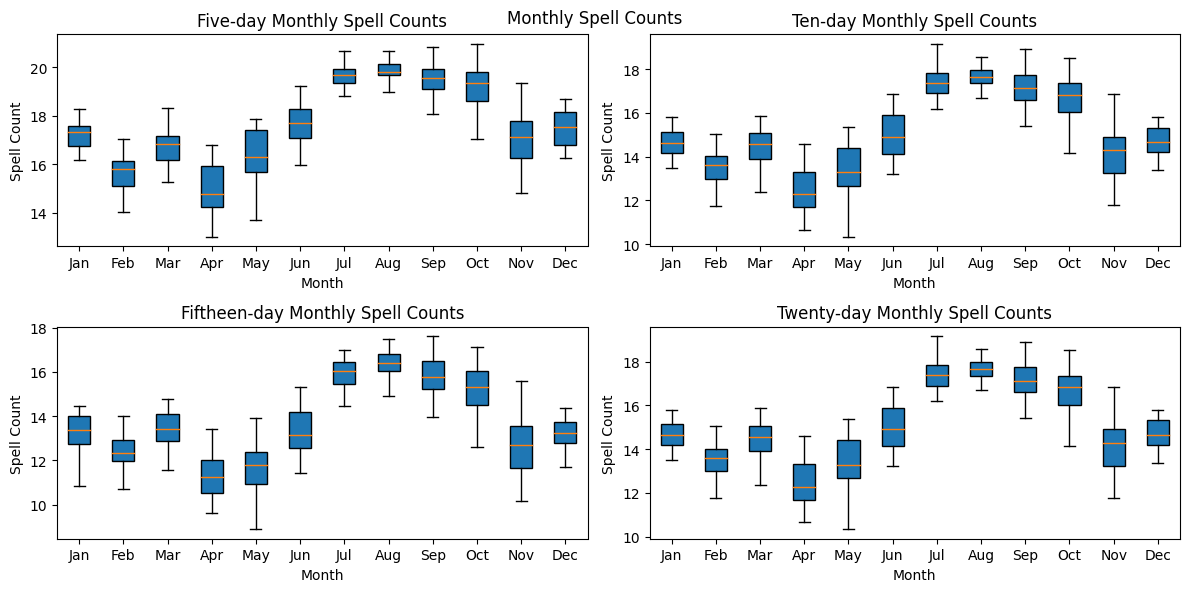

In [43]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Plot result_5
axes[0,0].boxplot(result_5, showfliers=False, patch_artist=True, labels=month_names)
axes[0,0].set_title('Five-day Monthly Spell Counts')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Spell Count')

# Plot result_10
axes[0,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[0,1].set_title('Ten-day Monthly Spell Counts')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Spell Count')

# Plot result_15
axes[1,0].boxplot(result_15.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,0].set_title('Fiftheen-day Monthly Spell Counts')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Spell Count')

# Plot result_20
axes[1,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,1].set_title('Twenty-day Monthly Spell Counts')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Spell Count')

# Adjust spacing between subplots
plt.tight_layout()
plt.suptitle('Monthly Spell Counts')
#
# Show the plot
#plt.show()

In [38]:
def spell_5_count_region(data):
    spells_5_count_West=data.sel(lon=slice(-2.4604,2.4604),lat=slice(-13.5317,13.5317))
    vw=spells_5_count_West.mean(['lon', 'lat'])
    spells_5_count_East=data.sel(lon=slice(-1.9577,1.9577),lat=slice(-37.2972,37.2972))
    ve=spells_5_count_East.mean(['lon', 'lat'])
    spells_5_count_North=data.sel(lon=slice(-32.2778,32.2778),lat=slice(-26.0198,26.0198))
    vn=spells_5_count_North.mean(['lon', 'lat'])
    spells_5_count_South=data.sel(lon=slice(-19.5687,19.5687),lat=slice(-24.3571,24.3571))
    vs=spells_5_count_South.mean(['lon', 'lat'])
    data = [vw,ve,vs,vn]
    #month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


    return spell_5_count_region

TypeError: ignored

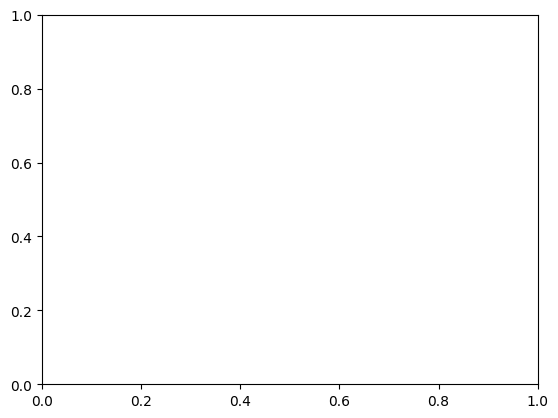

In [41]:
ddd = spell_5_count_region(spells_5_count)
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(ddd)

# Set the x-axis tick labels
ax.set_xticklabels(['Category 1', 'Category 2', 'Category 3','sd'])

# Set the labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Box Plot of Categories')

# Show the plot
plt.show()

In [27]:
#spells_10.sel(time=slice('2024','2026')).plot()

In [33]:
#spells_5.groupby('time.year').sum('time').plot(col='year', col_wrap=5, cmap='RdBu', vmax=20)

In [34]:
#spells_10.groupby('time.year').sum('time').plot(col='year', col_wrap=5, cmap='RdBu', vmax=20)

In [35]:
#spells_15.groupby('time.year').sum('time').plot(col='year', col_wrap=5, cmap='RdBu', vmax=20)

In [36]:
#spells_20.groupby('time.year').sum('time').plot(col='year', col_wrap=5, cmap='RdBu', vmax=20)

In [37]:
#spells_5_count.plot(col='year', col_wrap=5, cmap='RdBu_r', vmax=300)

In [ ]:
spells_5_count_West=spells_5_count.sel(lon=slice(-2.4604,2.4604),lat=slice(-13.5317,13.5317))
vw=spells_5_count_West.mean(['lon', 'lat'])

In [30]:
#sns.boxplot(vw.values)

In [ ]:
spells_5_count_East=spells_5_count.sel(lon=slice(-1.9577,1.9577),lat=slice(-37.2972,37.2972))
ve=spells_5_count_East.mean(['lon', 'lat'])

In [29]:
#sns.boxplot(ve.values)

In [ ]:
spells_5_count_North=spells_5_count.sel(lon=slice(-32.2778,32.2778),lat=slice(-26.0198,26.0198))
vn=spells_5_count_North.mean(['lon', 'lat'])

In [31]:
#sns.boxplot(vn.values)

In [ ]:
spells_5_count_South=spells_5_count.sel(lon=slice(-19.5687,19.5687),lat=slice(-24.3571,24.3571))
vs=spells_5_count_South.mean(['lon', 'lat'])

In [32]:
#sns.boxplot(vs.values)

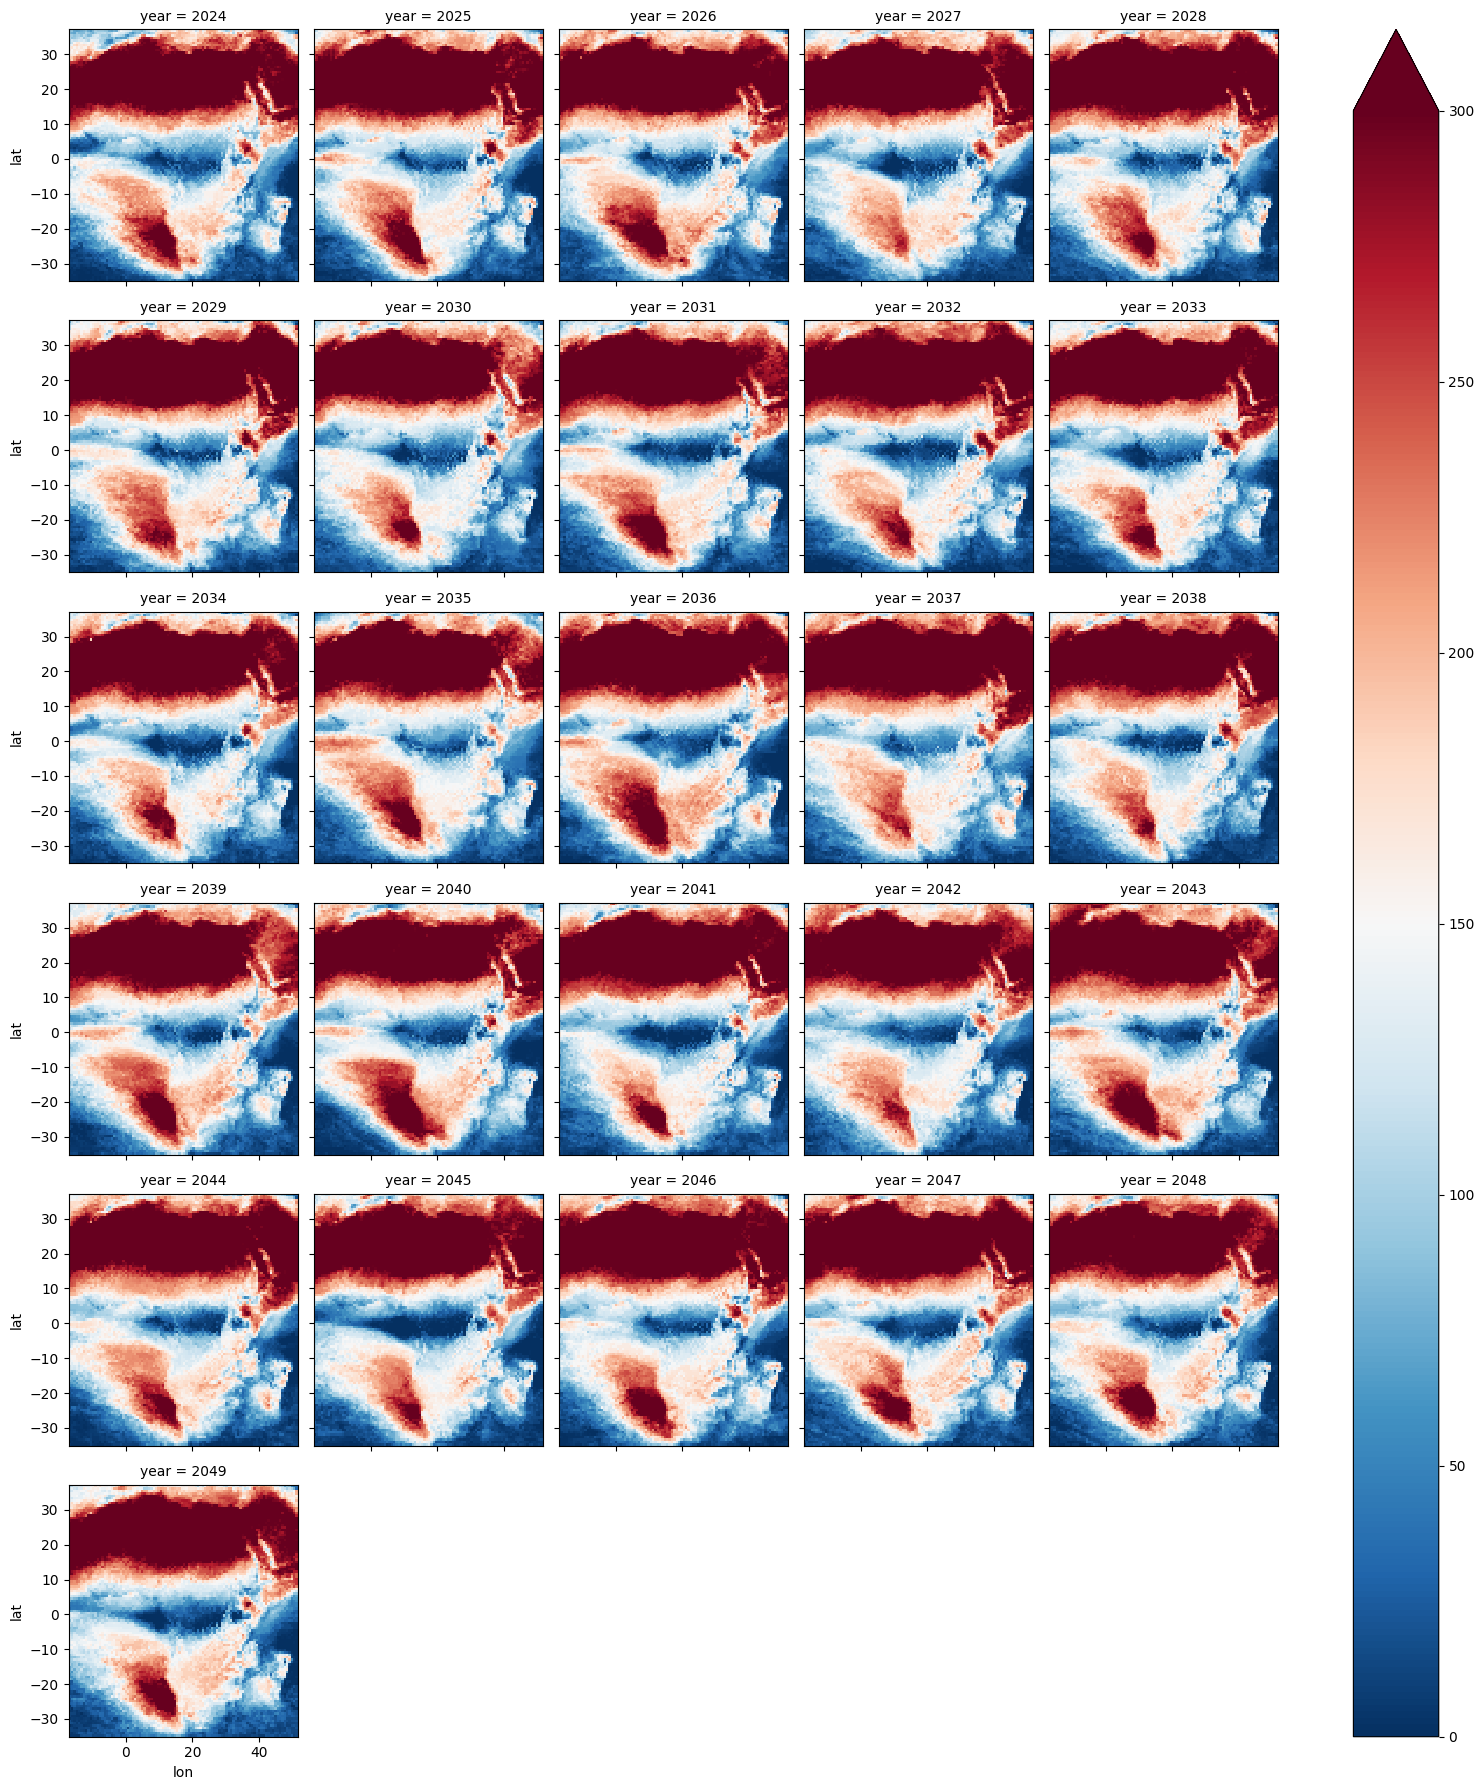

In [ ]:
spells_10_count.plot(col='year', col_wrap=5, cmap='RdBu_r', vmax=300)

In [ ]:
spells_10_count_West=spells_10_count.sel(lon=slice(-2.4604,2.4604),lat=slice(-13.5317,13.5317))
xw=spells_10_count_West.mean(['lon', 'lat'])

<Axes: >

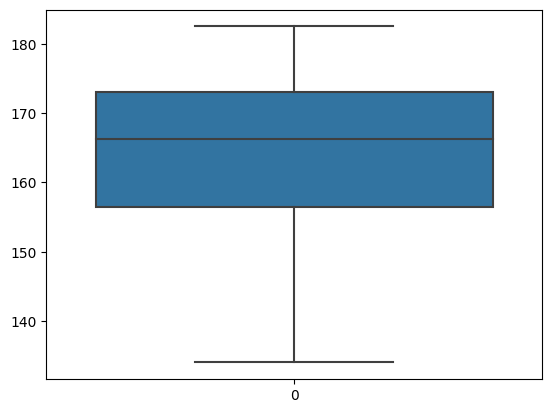

In [ ]:
sns.boxplot(xw.values)

In [ ]:
spells_10_count_East=spells_10_count.sel(lon=slice(-1.9577,1.9577),lat=slice(-37.2972,37.2972))
xe=spells_10_count_East.mean(['lon', 'lat'])

<Axes: >

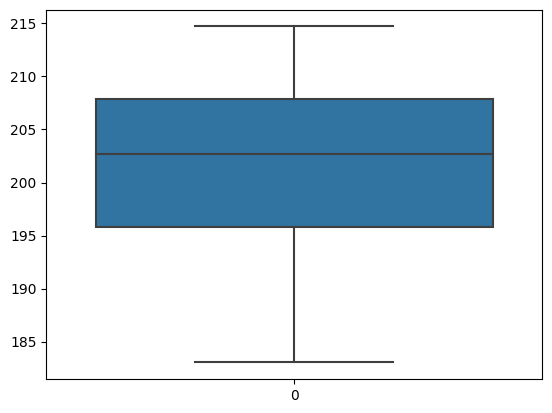

In [ ]:
sns.boxplot(xe.values)

In [ ]:
spells_10_count_North=spells_10_count.sel(lon=slice(-32.2778,32.2778),lat=slice(-26.0198,26.0198))
xn=spells_10_count_North.mean(['lon', 'lat'])

<Axes: >

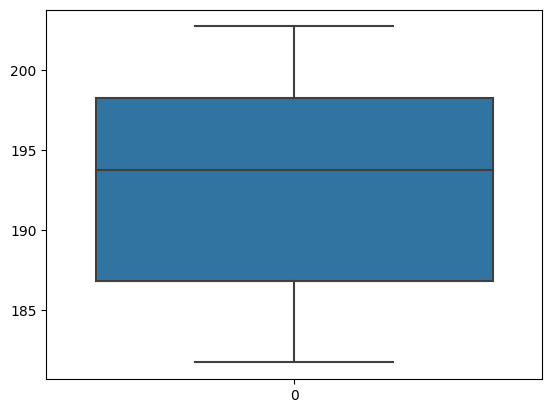

In [ ]:
sns.boxplot(xn.values)

In [ ]:
spells_10_count_South=spells_10_count.sel(lon=slice(-19.5687,19.5687),lat=slice(-24.3571,24.3571))
xs=spells_10_count_South.mean(['lon', 'lat'])

<Axes: >

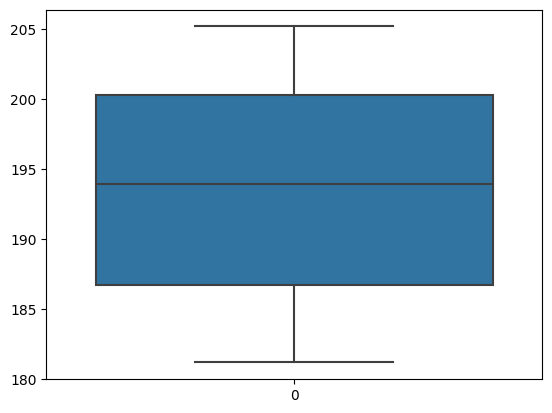

In [ ]:
sns.boxplot(xs.values)

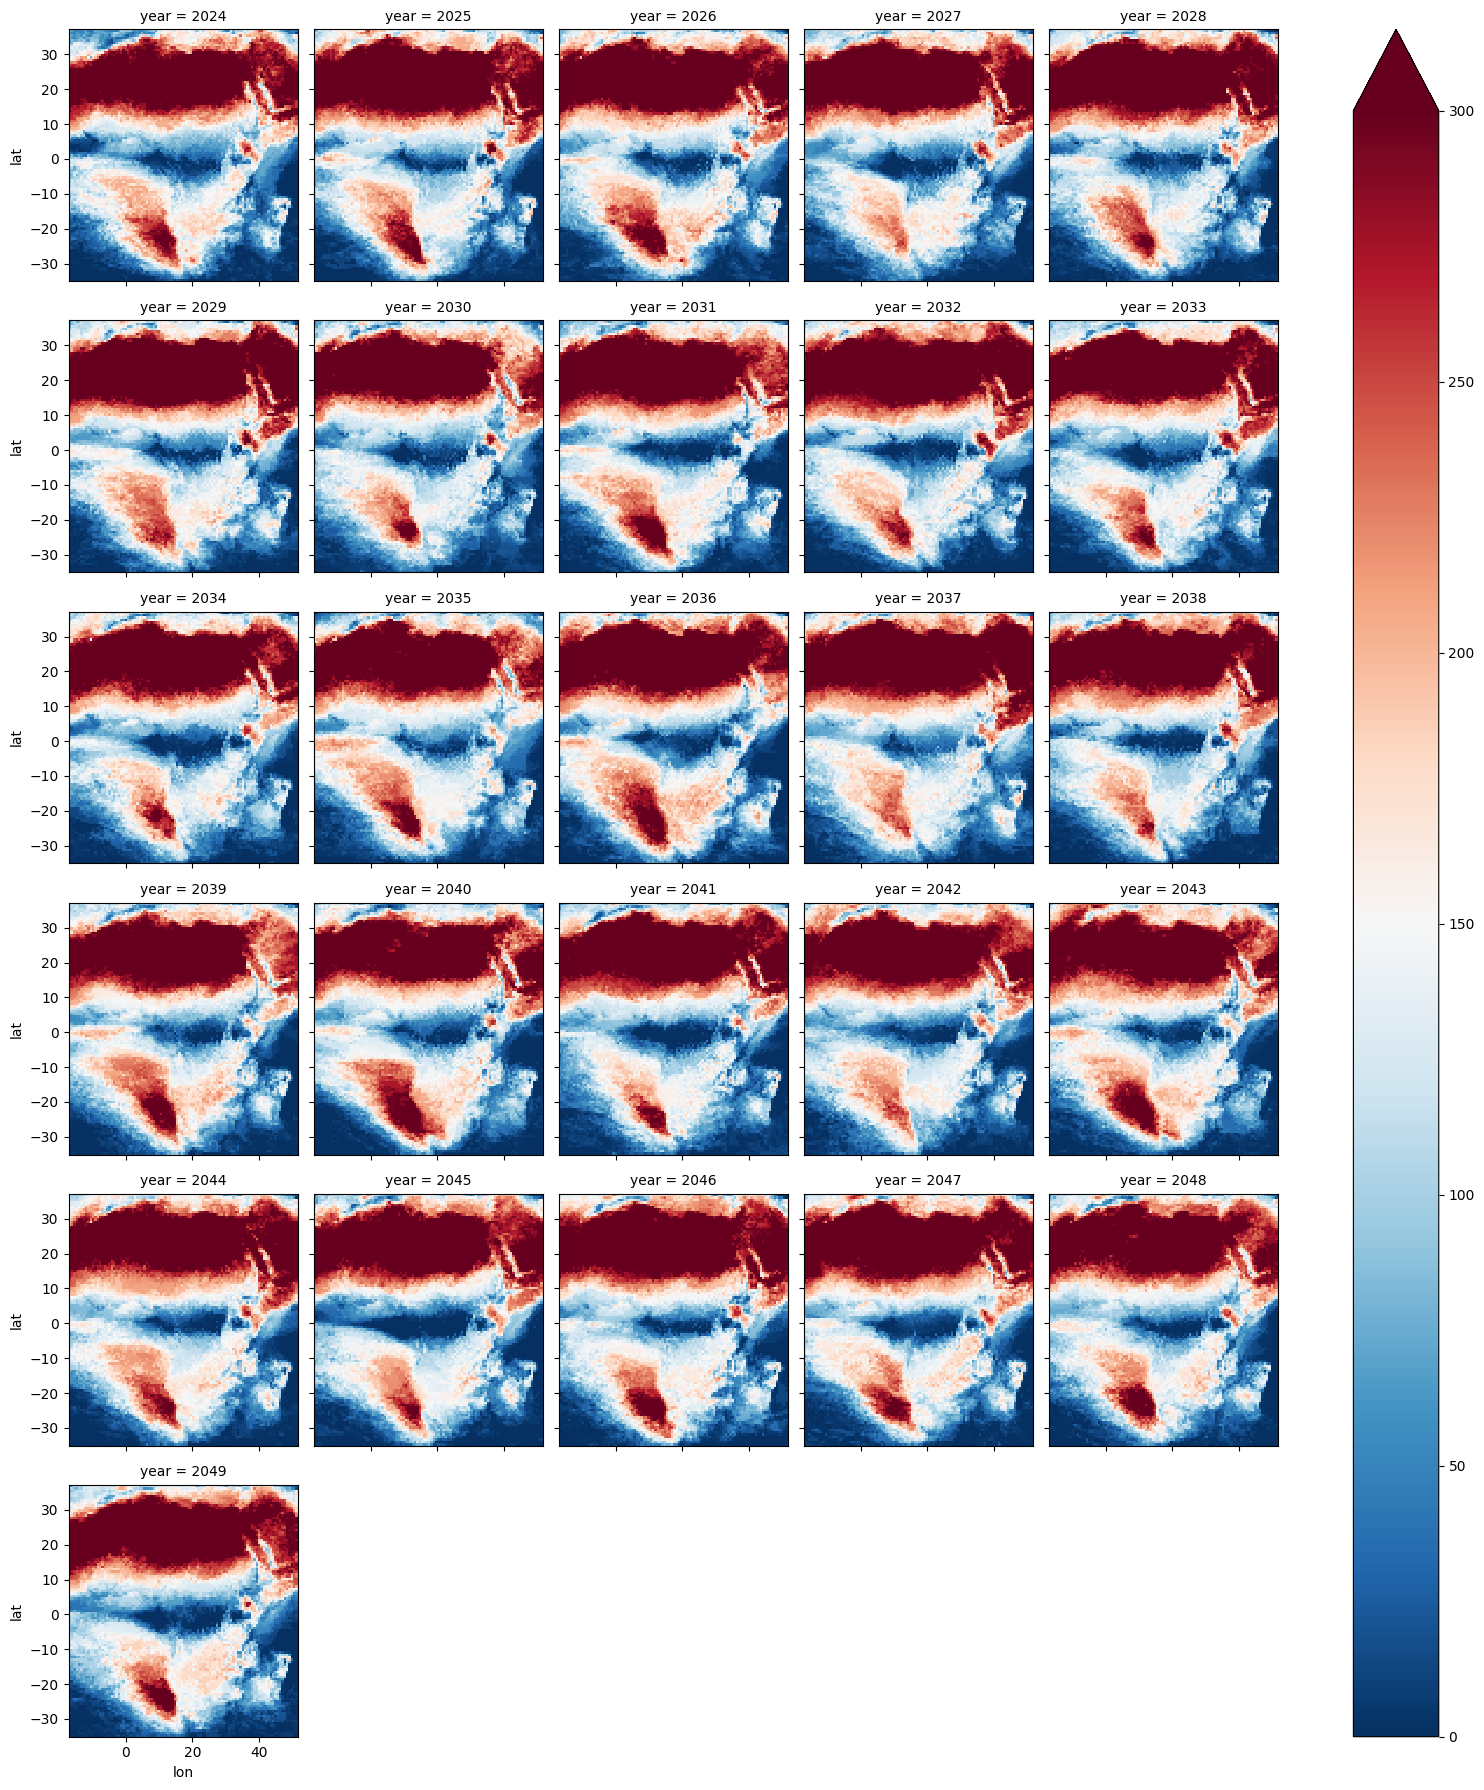

In [ ]:
spells_15_count.plot(col='year', col_wrap=5, cmap='RdBu_r', vmax=300)

In [ ]:
spells_15_count_West=spells_15_count.sel(lon=slice(-2.4604,2.4604),lat=slice(-13.5317,13.5317))
xvw=spells_15_count_West.mean(['lon', 'lat'])

<Axes: >

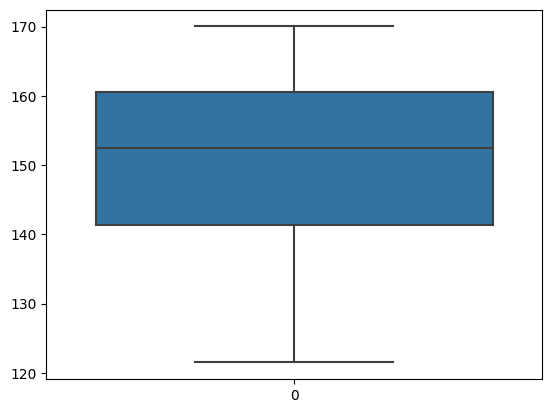

In [ ]:
sns.boxplot(xvw.values)

In [ ]:
spells_15_count_East=spells_15_count.sel(lon=slice(-1.9577,1.9577),lat=slice(-37.2972,37.2972))
xve=spells_15_count_East.mean(['lon', 'lat'])

<Axes: >

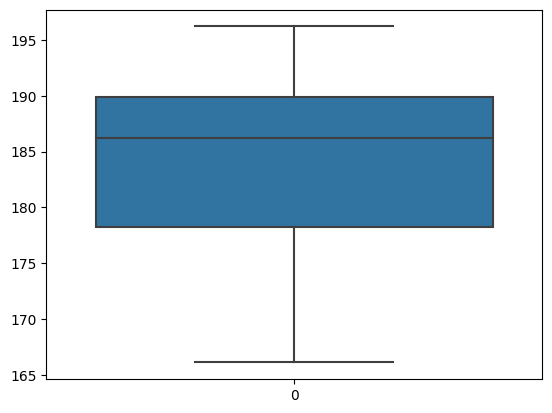

In [ ]:
sns.boxplot(xve.values)

In [ ]:
spells_15_count_North=spells_15_count.sel(lon=slice(-32.2778,32.2778),lat=slice(-26.0198,26.0198))
xvn=spells_15_count_North.mean(['lon', 'lat'])

<Axes: >

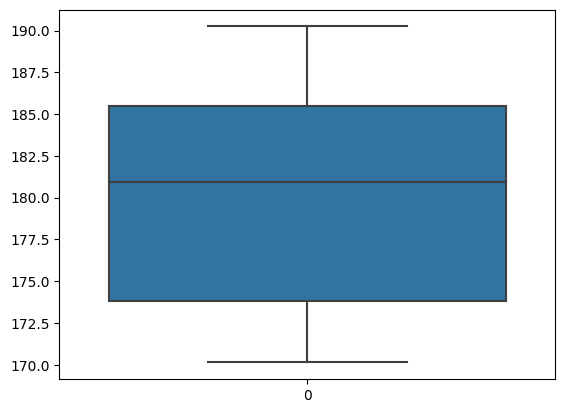

In [ ]:
sns.boxplot(xvn.values)

In [ ]:
spells_15_count_South=spells_15_count.sel(lon=slice(-19.5687,19.5687),lat=slice(-24.3571,24.3571))
xvs=spells_15_count_South.mean(['lon', 'lat'])

<Axes: >

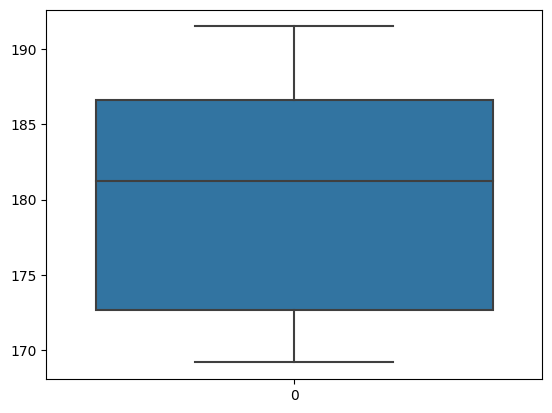

In [ ]:
sns.boxplot(xvs.values)

In [ ]:
spells_20_count.plot(col='year', col_wrap=5, cmap='RdBu_r', vmax=300)

In [ ]:
spells_20_count_West=spells_20_count.sel(lon=slice(-2.4604,2.4604),lat=slice(-13.5317,13.5317))
xxw=spells_20_count_West.mean(['lon', 'lat'])

<Axes: >

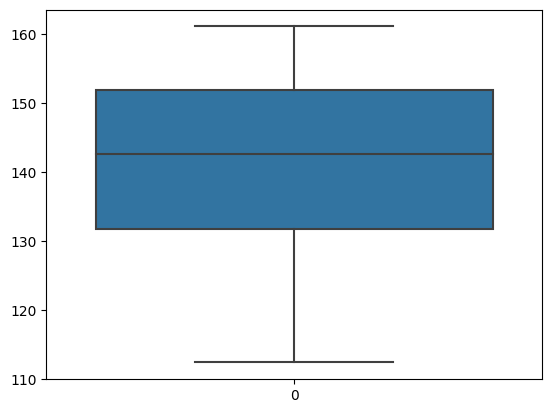

In [ ]:
sns.boxplot(xxw.values)

In [ ]:
spells_20_count_East=spells_20_count.sel(lon=slice(-1.9577,1.9577),lat=slice(-37.2972,37.2972))
xxe=spells_20_count_East.mean(['lon', 'lat'])

In [ ]:
sns.boxplot(xxe.values)

In [ ]:
spells_20_count_North=spells_20_count.sel(lon=slice(-32.2778,32.2778),lat=slice(-26.0198,26.0198))
xxn=spells_20_count_North.mean(['lon', 'lat'])

In [ ]:
sns.boxplot(xxn.values)

In [ ]:
spells_20_count_South=spells_20_count.sel(lon=slice(-19.5687,19.5687),lat=slice(-24.3571,24.3571))
xxs=spells_20_count_South.mean(['lon', 'lat'])

In [ ]:
sns.boxplot(xxs.values)

In [ ]:
# Select a single latitude and longitude location to plot
lat_idx = 0
lon_idx = 0

In [ ]:
spells_20_count.values

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ 63,  57,  40, ...,  76, 118, 143],
        [ 54,  41,  41, ...,  15,  36,   5],
        [ 57,  58,  42, ...,  36,  35,  32]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ 67,  66,  84, ...,  77,  88, 141],
        [ 84,  89,  63, ...,  36,  45,   9],
        [ 53,  62,  94, ...,  12,   8,   9]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   3, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ 48,  75, 118, ...,  62,  94, 107],
        [ 48,  48,  70, ...,  43,  21,  14],
        [ 47,  44,  56, ...,  10,   0,   0]],

       ...,

       [[  0,   3,   3, ...,   0,   0,   0],
        [  3,   2,   0, ...,   0,   0,   0],
        [  3,   0,   6, ...,   0,   0,   0

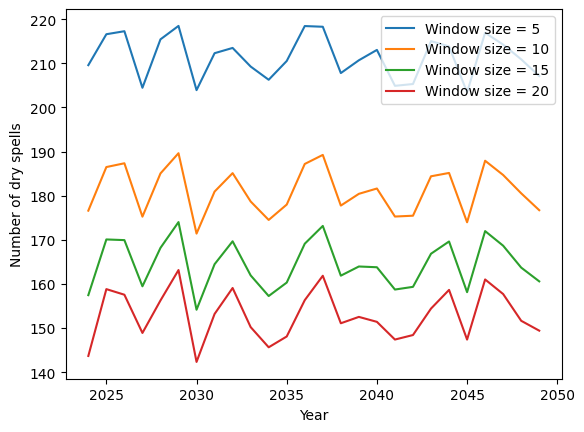

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the number of dry spells per year at the selected location
fig, ax = plt.subplots()
ax.plot(spells_5_count.year, spells_5_count.mean(['lon', 'lat']), label='Window size = 5')
ax.plot(spells_10_count.year, spells_10_count.mean(['lon', 'lat']), label='Window size = 10')
ax.plot(spells_15_count.year, spells_15_count.mean(['lon', 'lat']), label='Window size = 15')
ax.plot(spells_20_count.year, spells_20_count.mean(['lon', 'lat']), label='Window size = 20')
ax.set_xlabel('Year')
ax.set_ylabel('Number of dry spells')
ax.legend()
plt.show()
plt.savefig('Zola')

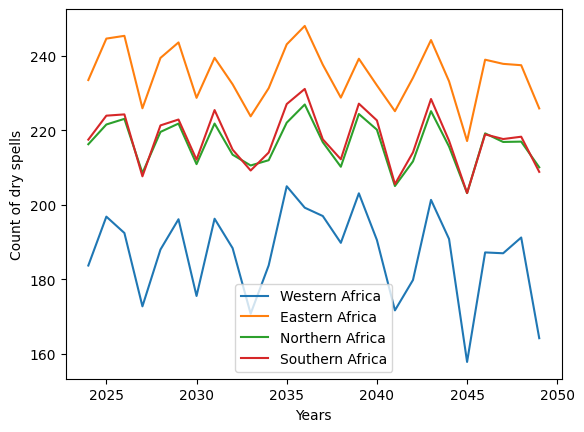

In [ ]:
# Plot the number of dry spells per year at the selected location
fig, ax = plt.subplots()
ax.plot(vw.year, vw.values, label='Western Africa')
ax.plot(ve.year, ve.values, label='Eastern Africa')
ax.plot(vn.year, vn.values, label='Northern Africa')
ax.plot(vs.year, vs.values, label='Southern Africa')
ax.set_xlabel('Years')
ax.set_ylabel('Count of dry spells')
ax.legend()
plt.show()

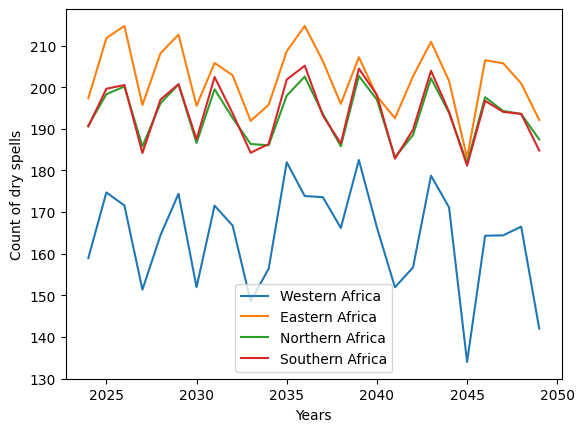

In [ ]:
# Plot the number of dry spells per year at the selected location
fig, ax = plt.subplots()
ax.plot(xw.year, xw.values, label='Western Africa')
ax.plot(xe.year, xe.values, label='Eastern Africa')
ax.plot(xn.year, xn.values, label='Northern Africa')
ax.plot(xs.year, xs.values, label='Southern Africa')
ax.set_xlabel('Years')
ax.set_ylabel('Count of dry spells')
ax.legend()
plt.show()

NameError: ignored

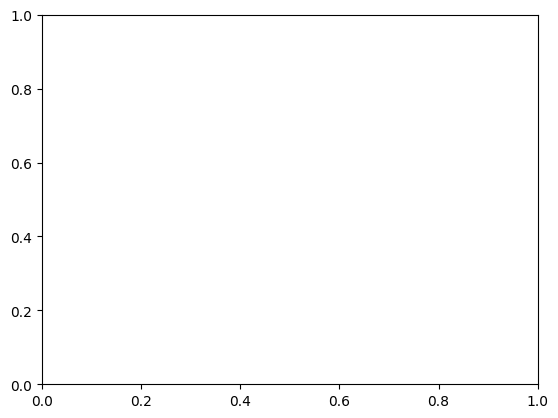

In [ ]:
# Plot the number of dry spells per year at the selected location
fig, ax = plt.subplots()
ax.plot(xvw.year, xvw.values, label='Western Africa')
ax.plot(xve.year, xve.values, label='Eastern Africa')
ax.plot(xvn.year, xvn.values, label='Northern Africa')
ax.plot(xvs.year, xvs.values, label='Southern Africa')
ax.set_xlabel('Years')
ax.set_ylabel('Count of dry spells')
ax.legend()
plt.show()

In [ ]:
# Plot the number of dry spells per year at the selected location
fig, ax = plt.subplots()
ax.plot(xxw.year, xxw.values, label='Western Africa')
ax.plot(xxe.year, xxe.values, label='Eastern Africa')
ax.plot(xxn.year, xxn.values, label='Northern Africa')
ax.plot(xxs.year, xxs.values, label='Southern Africa')
ax.set_xlabel('Years')
ax.set_ylabel('Count of dry spells')
ax.legend()
plt.show()